In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error,
    accuracy_score, confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/swobo/processed_titanic.csv")

print(df.head())
print(df.info())

  PassengerId  Cabin       Age  RoomService  FoodCourt  ShoppingMall  \
0     0013_01   2784  0.341772     0.000000   0.000000       0.00000   
1     0018_01   1867  0.240506     0.000000   0.000356       0.00000   
2     0019_01    257  0.392405     0.000000   0.000000       0.00000   
3     0021_01    259  0.481013     0.000000   0.263206       0.00000   
4     0023_01   1940  0.253165     0.000865   0.000000       0.07658   

        Spa    VRDeck  Name  Destination_PSO J318.5-22  \
0  0.000000  0.000000  2912                      False   
1  0.142260  0.000000  2406                      False   
2  0.000000  0.000000  3376                      False   
3  0.009121  0.026266  2711                      False   
4  0.000000  0.000000   668                      False   

   Destination_TRAPPIST-1e  HomePlanet_Europa  HomePlanet_Mars  \
0                     True              False            False   
1                     True              False            False   
2                   

In [3]:
# 1. Подготовка данных 
# Удалим столбцы, которые не несут информативности для обучения
df = df.drop(['PassengerId', 'Name'], axis=1)

# Проверим на пропуски и заменим их средним (для числовых) или 0 (для категориальных)
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(0)

In [4]:
# 2. Разделение данных для задачи регрессии 
# Целевая переменная — возраст (Age)
X_reg = df.drop(['Age'], axis=1)
y_reg = df['Age']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

In [5]:
# 3. Масштабирование признаков 
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

In [6]:
# 4. Обучение модели линейной регрессии 
linreg = LinearRegression()
linreg.fit(X_train_reg_scaled, y_train_reg)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# 5. Предсказание и оценка модели 
y_pred_reg = linreg.predict(X_test_reg_scaled)

mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)

print("\n=== Оценка линейной регрессии ===")
print(f"MSE  = {mse:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"MAE  = {mae:.3f}")


=== Оценка линейной регрессии ===
MSE  = 0.028
RMSE = 0.167
MAE  = 0.130


In [8]:
# 6. Задача КЛАССИФИКАЦИИ
# Целевая переменная — CryoSleep_True
X_clf = df.drop(['CryoSleep_True'], axis=1)
y_clf = df['CryoSleep_True']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42
)
# Масштабируем признаки (логистическая регрессия чувствительна к масштабу)
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

In [9]:
# 7. Обучение модели логистической регрессии
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_clf_scaled, y_train_clf)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
# 8. Предсказания и оценка классификации
y_pred_clf = logreg.predict(X_test_clf_scaled)

acc = accuracy_score(y_test_clf, y_pred_clf)
cm = confusion_matrix(y_test_clf, y_pred_clf)
report = classification_report(y_test_clf, y_pred_clf)

print("\n=== Оценка логистической регрессии ===")
print(f"Accuracy: {acc:.3f}")
print("\nМатрица ошибок:")
print(cm)
print("\nОтчет о классификации:\n", report)


=== Оценка логистической регрессии ===
Accuracy: 0.933

Матрица ошибок:
[[758  73]
 [ 13 440]]

Отчет о классификации:
               precision    recall  f1-score   support

       False       0.98      0.91      0.95       831
        True       0.86      0.97      0.91       453

    accuracy                           0.93      1284
   macro avg       0.92      0.94      0.93      1284
weighted avg       0.94      0.93      0.93      1284



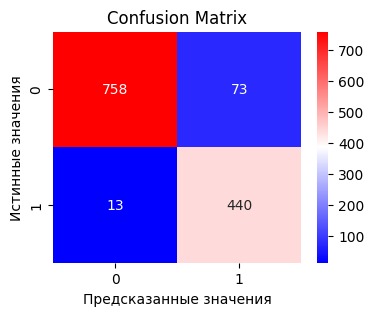

In [11]:
# 9. Визуализация матрицы ошибок
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='bwr')
plt.title('Confusion Matrix')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()